In [1]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [38]:
def optimize_cluster(k_min, k_max, data):
    # elbow method 이용해서 최적의 k값 찾을 수 있도록
    X = data
    k_range = list(range(k_min, k_max+1))
    # elbow point를 찾는 이유는 군집수를 늘렸음에도 불구하고
    # 거리 제곱의 합이 크게 줄어들지 않는 지점을 찾기 위함
    # 군집수를 늘렸을 때 군집 내 거리 제곱의 합은 당연히 줄어듬
    # 포인트는 크게 줄어들지 않는 그 순간을 찾는 것
    sum_of_dist = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=21)
        kmeans.fit(X)
        sum_of_dist.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(k_range, sum_of_dist, 'o')
    plt.plot(k_range, sum_of_dist, '-', alpha=0.5)
    plt.title("Elbow Point")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")

def vis_cluster(data, opt_k, x, y, p):
    # 시각화용 함수

    kmeans = KMeans(n_clusters=opt_k, random_state=21)

    label = kmeans.fit_predict(data)
    
    plt.figure(figsize=(15, 6))
    
    sns.scatterplot(data=data, x=x, y=y, hue=label, palette=p, s=70)

In [4]:
data = pd.read_csv("../../data/final_data/final_df_진짜최종.csv")

title = data.iloc[:,:1]
data = data.iloc[:, 1:]

In [5]:
title.head(3)

,title
0,광화문연가
1,그날들
2,그리스


In [6]:
data.head(3)

,size,price,comedy,drama,fantasy,mystery,romance,thriller,history,n_감동,...,a_아름다운,a_아쉬운,a_예쁜,a_완벽한,a_유쾌한,a_재미있는,a_좋았던,a_즐거운,a_행복한,a_화려한
0,1,150000,0,0,1,0,1,0,0,1,...,6,7,0,0,0,8,10,3,4,5
1,1,160000,0,1,0,0,0,0,1,6,...,4,5,0,0,0,7,10,6,3,9
2,1,140000,0,1,0,0,0,0,1,4,...,1,7,0,3,0,8,10,5,4,6


c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

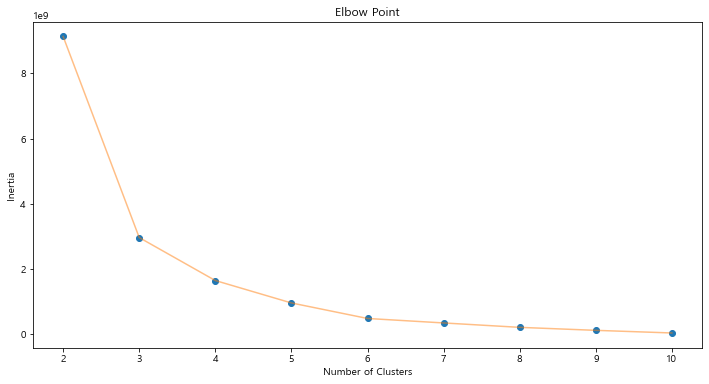

In [7]:
optimize_cluster(2, 10, data)

In [8]:
kmeans_opt = KMeans(n_clusters=3, random_state=21)
label_1 = kmeans_opt.fit_predict(data)

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
label_1

array([0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 2, 2])

In [10]:
from collections import Counter

Counter(label_1)

Counter({0: 22, 1: 18, 2: 7})

In [11]:
title["label_1"] = label_1

In [12]:
title

,title,label_1
0,광화문연가,0
1,그날들,0
2,그리스,0
3,난설,1
4,드라큘라(Dracula: The Musical),0
5,땡큐 베리 스트로베리,1
6,랭보,1
7,레드북,2
8,레베카,0
9,렌트,0


In [13]:
for i in range(7) :
    print(f'[{i}] {list(title[title["label_1"] == i]["title"])}')

[0] ['광화문연가', '그날들', '그리스', '드라큘라(Dracula: The Musical)', '레베카', '렌트', '마리앙투아네트', '맘마미아', '모차르트', '베르테르', '벤허', '브로드웨이42번가', '빌리엘리어트', '스위니토드', '시카고', '썸씽로튼', '아이다', '엑스칼리버', '엘리자벳', '영웅', '웃는남자', '지킬앤하이드']
[1] ['난설', '땡큐 베리 스트로베리', '랭보', '렛미플라이', '리지', '명동로망스', '빈센트 반 고흐', '빨래', '사의찬미', '시데레우스', '아랑가', '이토록 보통의', '전설의 리틀 농구단', '차미', '쿠로이 저택엔 누가 살고 있을까?', '팬레터', '포미니츠', '해적']
[2] ['레드북', '마리퀴리', '베르나르다 알바', '젠틀맨스가이드', '킹아더', '헤드윅', '호프: 읽히지 않은 책과 읽히지 않은 인생']
[3] []
[4] []
[5] []
[6] []


c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


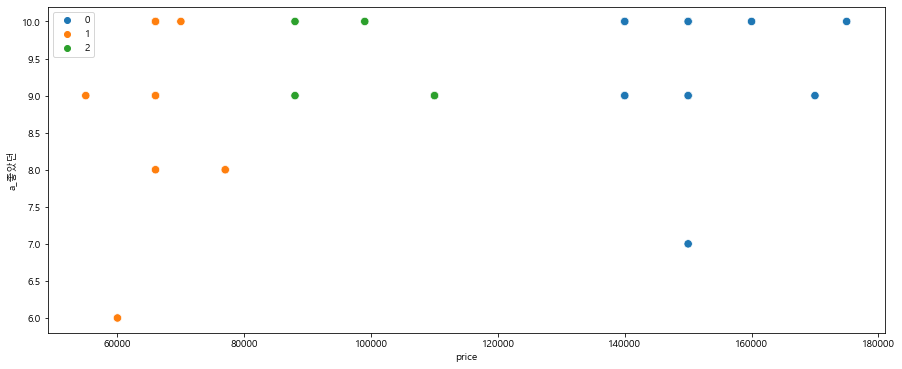

In [39]:
vis_cluster(data, 3, "price", "a_좋았던", "tab10")

In [40]:
data_s = data.copy()

In [41]:
data_s.columns

Index(['size', 'price', 'comedy', 'drama', 'fantasy', 'mystery', 'romance',
       'thriller', 'history', 'n_감동', 'n_내용', 'n_넘버', 'n_노래', 'n_눈물', 'n_마음',
       'n_무대', 'n_사랑', 'n_생각', 'n_앙상블', 'n_연기', 'n_연출', 'n_음악', 'n_처음', 'n_최고',
       'n_추천', 'n_페어', 'n_힐링', 'a_귀여운', 'a_따듯한', 'a_멋있는', 'a_새로운', 'a_슬픈',
       'a_신나는', 'a_아름다운', 'a_아쉬운', 'a_예쁜', 'a_완벽한', 'a_유쾌한', 'a_재미있는', 'a_좋았던',
       'a_즐거운', 'a_행복한', 'a_화려한'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 평균 0, 분산 1
scale_columns = ['price','n_감동', 'n_내용', 'n_넘버', 'n_노래', 'n_눈물', 'n_마음',
       'n_무대', 'n_사랑', 'n_생각', 'n_앙상블', 'n_연기', 'n_연출', 'n_음악', 'n_처음', 'n_최고',
       'n_추천', 'n_페어', 'n_힐링', 'a_귀여운', 'a_따듯한', 'a_멋있는', 'a_새로운', 'a_슬픈',
       'a_신나는', 'a_아름다운', 'a_아쉬운', 'a_예쁜', 'a_완벽한', 'a_유쾌한', 'a_재미있는', 'a_좋았던',
       'a_즐거운', 'a_행복한', 'a_화려한']
data_s[scale_columns] = scaler.fit_transform(data_s[scale_columns])

In [45]:
data_s.head()

,size,price,comedy,drama,fantasy,mystery,romance,thriller,history,n_감동,...,a_아름다운,a_아쉬운,a_예쁜,a_완벽한,a_유쾌한,a_재미있는,a_좋았던,a_즐거운,a_행복한,a_화려한
0,1,1.022161,0,0,1,0,1,0,0,-0.662179,...,1.123425,0.528925,-0.560633,-0.466337,-0.392788,-0.675528,0.769252,-0.614010,-0.399901,1.160081
1,1,1.280033,0,1,0,0,0,0,1,0.893942,...,0.455058,-0.528925,-0.560633,-0.466337,-0.392788,-1.557467,0.769252,0.481881,-0.921995,2.567147
2,1,0.764289,0,1,0,0,0,0,1,0.271493,...,-0.547492,0.528925,-0.560633,2.994372,-0.392788,-0.675528,0.769252,0.116584,-0.399901,1.511847
3,0,-1.427623,0,0,0,0,1,0,1,0.271493,...,0.120875,0.000000,-0.560633,0.687233,-0.392788,1.088351,-0.397033,-0.248713,-1.444088,1.863614
4,1,1.666841,0,0,1,0,0,0,1,-0.350955,...,-0.547492,0.528925,-0.560633,-0.466337,-0.392788,-0.675528,0.769252,0.116584,-0.399901,1.511847


c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

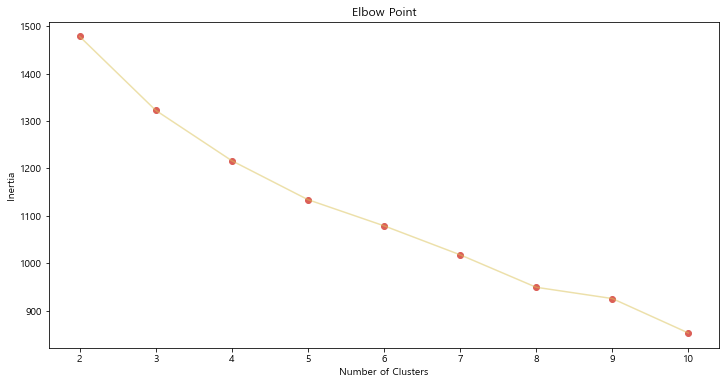

In [43]:
optimize_cluster(2, 10, data_s)

In [51]:
kmeans_opt = KMeans(n_clusters=9, random_state=21)
label_2 = kmeans_opt.fit_predict(data_s)

c:\Users\mool8\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
Counter(label_2)

Counter({1: 13, 3: 8, 2: 6, 0: 1, 4: 6, 8: 5, 5: 2, 7: 2, 6: 4})

In [54]:
title["label_2"] = label_2

for i in range(9) :
    print(f'[{i}] {list(title[title["label_2"] == i]["title"])}')

[0] ['리지']
[1] ['광화문연가', '그날들', '땡큐 베리 스트로베리', '스위니토드', '시데레우스', '썸씽로튼', '아랑가', '아이다', '엘리자벳', '영웅', '전설의 리틀 농구단', '헤드윅', '호프: 읽히지 않은 책과 읽히지 않은 인생']
[2] ['레베카', '렌트', '렛미플라이', '마리앙투아네트', '마리퀴리', '맘마미아']
[3] ['그리스', '난설', '드라큘라(Dracula: The Musical)', '랭보', '레드북', '시카고', '엑스칼리버', '해적']
[4] ['명동로망스', '모차르트', '베르나르다 알바', '베르테르', '젠틀맨스가이드', '지킬앤하이드']
[5] ['빈센트 반 고흐', '빌리엘리어트']
[6] ['차미', '쿠로이 저택엔 누가 살고 있을까?', '킹아더', '팬레터']
[7] ['웃는남자', '이토록 보통의']
[8] ['벤허', '브로드웨이42번가', '빨래', '사의찬미', '포미니츠']


------------